CNN_BC

In [1]:
# # if running on a GPU machine, uncomment this cell and select a GPU by changing the CUDA_VISIBLE_DEVICES index
# # in terminal to view active GPUs:
# # watch -d -n 0.5 nvidia-smi

# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
from Data_Creator_BC import Data_Creator_BC as Data_Creator
from CNN_DS_BN_BC import CNN_DS_BN_BC
from CNN_BC_Trainer import CNN_BC_Trainer

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../modules'))

from data_manipulation import *


In [3]:
red_bls, gains, uvd = load_relevant_data('../zen_data/zen.2458098.58037.xx.HH.uv','../zen_data/zen.2458098.58037.xx.HH.uv.abs.calfits')
training_redundant_baselines_dict, testing_redundant_baselines_dict = get_or_gen_test_train_red_bls_dicts(red_bls, gains.keys())
training_baselines_data = get_seps_data(training_redundant_baselines_dict, uvd)
testing_baselines_data = get_seps_data(testing_redundant_baselines_dict, uvd)

In [4]:
positive_negative_classifier = CNN_DS_BN_BC('positive_negative_classifier', 2, adam_initial_learning_rate = 0.0001)
positive_negative_classifier.print_params()

{'adam_initial_learning_rate': 0.0001,
 'log_dir': 'logs/',
 'name': 'positive_negative_classifier',
 'num_downsamples': 2}


In [9]:
positive_negative_classifier._layers

[<tf.Tensor 'conv_layer_0/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 512, 2) dtype=float32>,
 <tf.Tensor 'conv_layer_1/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 256, 4) dtype=float32>]

In [5]:
trainer = CNN_BC_Trainer(positive_negative_classifier,
                         Data_Creator,
                         num_epochs = 500,
                         batch_size=2)
trainer.print_params()

{'batch_size': 2,
 'downsample_keep_prob': 0.9,
 'log_dir': 'logs/',
 'metric_names': ['costs', 'accuracies'],
 'model_save_interval': 25,
 'name': 'positive_negative_classifier',
 'num_epochs': 500,
 'pretrained_model_path': None,
 'sample_keep_prob': 0.8}


In [6]:
trainer.add_data((training_baselines_data, training_redundant_baselines_dict),
                 (testing_baselines_data, testing_redundant_baselines_dict),
                 gains,
                 num_flatnesses = 2)

In [7]:
trainer.train()

saving metrics - saved

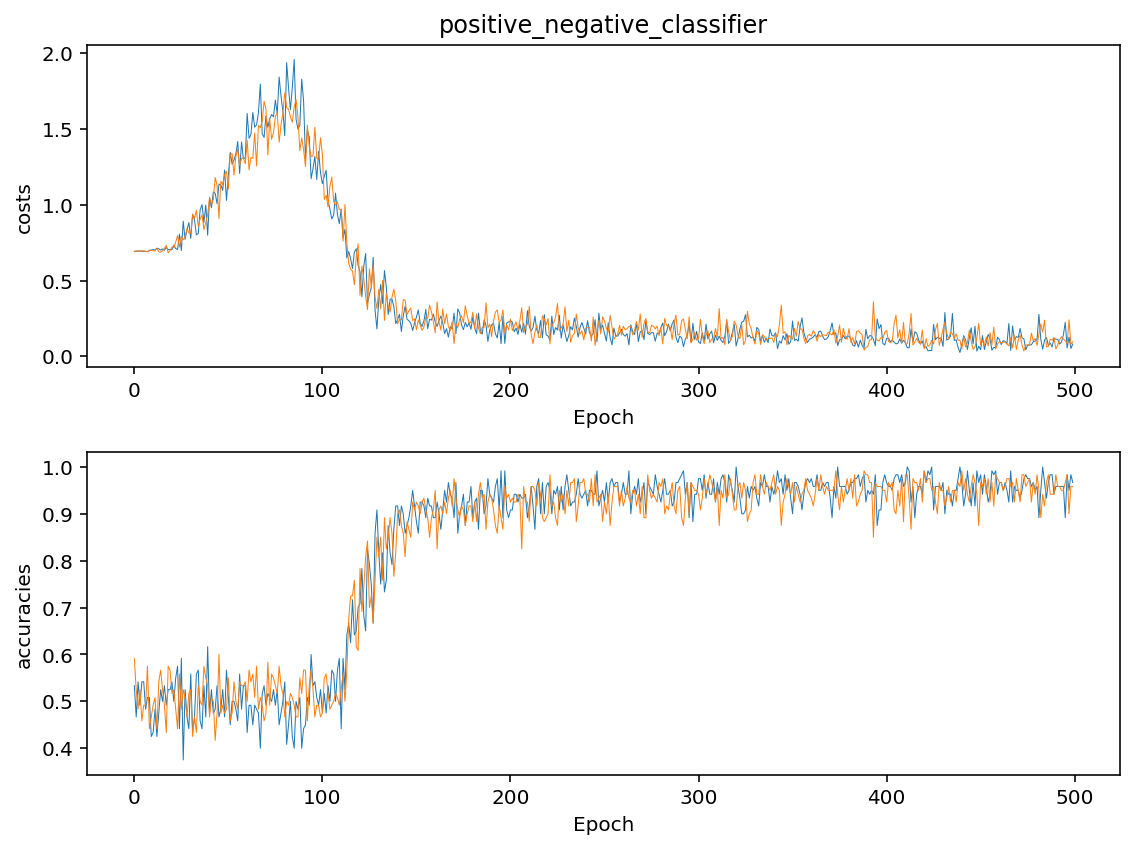

In [8]:
trainer.plot_metrics()